In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit
import sklearn

In [3]:
pd.__version__

'1.1.0'

In [4]:
np.__version__

'1.19.5'

In [6]:
sklearn.__version__

'0.19.1'

In [26]:
matplotlib.__version__

'2.1.2'

In [27]:
sns.__version__

'0.8.1'

In [7]:
df=pd.read_excel('ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [9]:
df.shape

(768, 10)

In [13]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

## Simple Linear Regression

Simple linear regression model estimates the relationship between two quantitative variables where one is referred to as the independent variable and the other the dependent variable. The independent variable (X) is used to predict and also called the predictor while the predicted variable is referred to as the response variable (Y) (e.g. finding the relationship between the amount of CO2 gas emitted and the number of trees cut down). The value of Y can be obtained from X by finding the line of best fit (regression line) with minimum error for the data points on a scatter plot for both variables.

In [14]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
                'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area',
                'X8': 'Glazing_Area_Distribution',
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
df = df.rename(columns=column_names)

In [15]:
df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

### Effect of Relative Compactness on Cooling Load

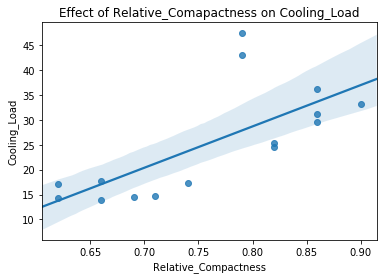

In [16]:
#Select a sample of the dataset
import matplotlib.pyplot as plt
simple_linear_reg_df =df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)
#Regression plot
sns.regplot(x='Relative_Compactness', y='Cooling_Load', data=simple_linear_reg_df)
plt.title('Effect of Relative_Comapactness on Cooling_Load');


### Effect of Relative Compactness on Heating load

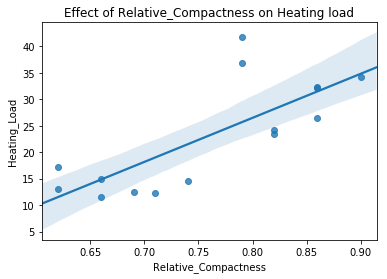

In [17]:
#Select a sample of the dataset
import matplotlib.pyplot as plt
simple_linear_reg_df =df[['Relative_Compactness', 'Heating_Load']].sample(15, random_state=2)
#Regression plot
sns.regplot(x='Relative_Compactness', y='Heating_Load', data=simple_linear_reg_df)
plt.title('Effect of Relative_Compactness on Heating load');


From the regression plots above, we can see that the residuals of the dummy data are spread across the regression line as they should be to meet the linearity assumption unlike the residuals of the energy efficiency dataset which are a bit farther from the regression line.

In [19]:
#checking missing values
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [21]:
df.corr().head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000,-0.991901,-0.203782,-0.868823,0.827747,0.0,1.283986e-17,1.764620e-17,0.622272,0.634339
Surface_Area,-0.991901,1.000000,0.195502,0.880720,-0.858148,0.0,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
Wall_Area,-0.203782,0.195502,1.000000,-0.292316,0.280976,0.0,-7.969726e-19,0.000000e+00,0.455671,0.427117
Roof_Area,-0.868823,0.880720,-0.292316,1.000000,-0.972512,0.0,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
Overall_Height,0.827747,-0.858148,0.280976,-0.972512,1.000000,0.0,1.861418e-18,0.000000e+00,0.889430,0.895785


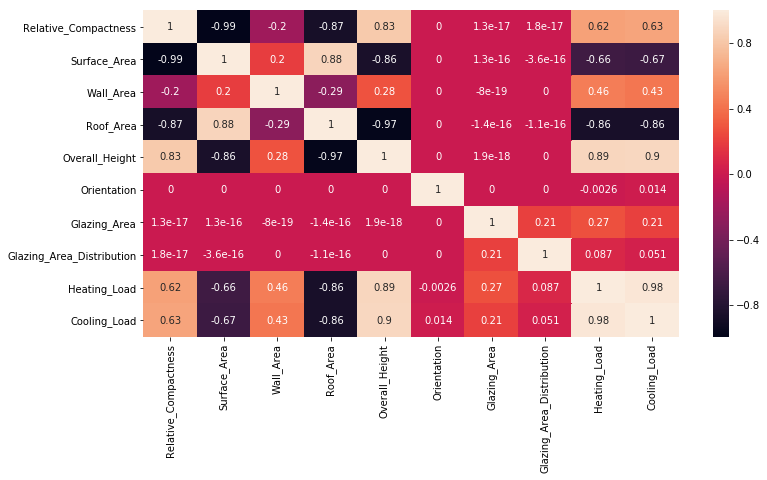

In [22]:
#Checking Correlation using heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True);

The energy efficiency dataset shows a strong correlation between relative compactness and surface area, relative compactness and overall height, surface area and roof area while the variables in the dummy dataset are seen to be independent of each other.

## Assumptions in  Simple Linear Regression


For better understanding, we explain the assumptions made by linear regression by comparing results on our energy efficiency dataset and a dummy linear dataset generated to have similar shape (same number of rows and column) as the energy efficiency dataset. Some assumptions made by linear regression models about the data are:

1. Linearity: the relationship between the variables is linear such that a straight line is the line of best fit.

2. Homoscedasticity: the residuals or prediction errors are of equal or constant variance.

3. Normality: the residuals are of a normal distribution

4. Independence: predictor variables are independent of one another.

## Terms with LR

Collinearity is a measure used to describe the linear relationship btw 2variables. Ranges from -1(for a perfect negative) to 
+1(a perfect positive correlation)

Gradient Descent Algorithm is an optimization algorithm that minimizes a cost function by specifying the direction to move
towards to obtain a local or global minima.

Cost Function is a measure of the performance of the model. i.e how close the predicted values are to the real values. 
In LR, the cost function can be define as the sum of squared errors in the trainig set.

Multicollinearity is a situation where 2 or more of the predictors have a strong correlation

In [ ]:
#Polynomial Regression model is a linear regression model that can be used when a curvilinear relationship exists btw the
#predictors and the response variable.
#The complexity of the model increases as the degree of the polynomial increases. 

## Multiple Linear Regression

Multiple linear regression establishes the relationship between the response variable and the predictors (usually two or more). In reality, several factors contribute to a certain outcome as opposed to just one as suggested by simple linear regression.

 ## Regresssion Performance Metrics

Evaluation Metrics for performance (RSS, R-Squared, RMSE, MAE etc)

How well a regression model performs can be obtained by how close the predicted value is to the ground truth. It is very important to use the appropriate metric to evaluate the performance. some examples of metrics used in evaluating regression models are RSS, R-Squared, RMSE and MAE

### Mean Absolute Error (MAE)


MAE  is easy and intuitive such that it calculates the sum of the  average of the absolute error between the predicted values and the true values. Since the absolute difference is taken, this metric does not consider direction.

The smaller the MAE is, the better the model. Therefore, if the MAE is 0, the model is perfect and accurately predicts results which is almost impossible.  The mean absolute error is more robust to outliers

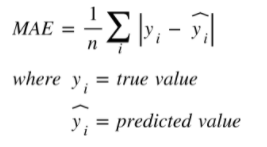

### Residual Sum of Squares (RSS)

Also known as the sum of squared residuals (SSR), this metric explains the variance in the representation of the dataset by the model; it measures how well the model approximates the data. 

A residual is the estimated error made by a model. In simpler terms, it is the difference between the nth true value and the nth predicted value by the model. RSS is the sum of the square of errors between the residuals in a model. The lower the RSS, the better the model’s estimations and vice versa.

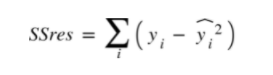

### R-Squared (R2 score) 

Also known as the coefficient of determination, r-squared is a metric used in regression to determine the goodness of fit of the model.

values ranges from 0 to 1, It gives information on the percentage of the response variable  explained by the model. Mostly, the higher the value, the better the model however, this is not necessarily always true.

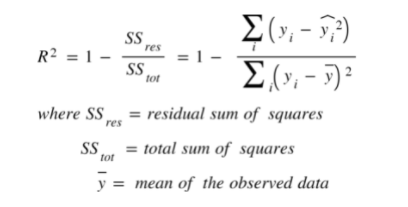

### Model complexity, Underfitting and Overfitting

Model complexity refers to the number of input features used to train a model and the algorithmic learning complexity. An overly complex model can be difficult to interpret, prone to overfitting and also require more computing. When creating models, it is imperative for the model to generalise well enough to make reasonable predictions on new and unseen data. An overfit model will perform well on the training data and poorly on unseen data.

While a model is required to learn the actual relationship of the variables in the training set, an overfit model memorises the training set, fits the noise, outliers and irrelevant information, then makes predictions based on this noise which is incorrect which in turn decrease the efficiency and accuracy of the model.

On the other hand, when a model is too simple, it can be as a result of having very few features not sufficient enough to learn details and relationships in the data. 

### The Bias-Variance tradeoff

Bias and variance are common occurrences in machine learning and there is a constant struggle to achieve low bias and variance.

Bias is a measure of correctness of a model i.e. how far off is a model from being correct? While high bias results in an increase in the error by making assumptions which prevent the model from capturing relevant relationships between the predictors and response variable, low bias gives lower error and also prevents underfitting by capturing important relationships.

On the other hand, variance tells how much the values estimated by a model will vary across different training data. When the variance is low, it means that there is only a small change in the estimate of the model with  new training  data.

A high variance causes overfitting such that the changes in estimates obtained with new training data is large because the model is so complex that it has now learnt patterns from one training data such that it cannot generalise to other training sets. While it is essential to obtain low bias and low variance, it is almost impossible to achieve this simultaneously which is where the ‘bias-variance tradeoff’ occurs. 

In [25]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [26]:
df.mean()

Relative_Compactness           0.764167
Surface_Area                 671.708333
Wall_Area                    318.500000
Roof_Area                    176.604167
Overall_Height                 5.250000
Orientation                    3.500000
Glazing_Area                   0.234375
Glazing_Area_Distribution      2.812500
Heating_Load                  22.307195
Cooling_Load                  24.587760
dtype: float64

In [27]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
y = normalised_df['Heating_Load']

In [28]:
X.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0


## Model Building

In [29]:
#Now, we split our dataset into training and testing dataset since the feature and target variable has been segmented
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3,random_state=42)



In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [31]:
y_mean = y_train.mean()
y_mean

0.432475135974551

In [32]:
#baseline mean absolute error for  training data model
y_pred_baseline = [y_mean]*len(y_train)
y_pred_baseline[:5] 

[0.432475135974551,
 0.432475135974551,
 0.432475135974551,
 0.432475135974551,
 0.432475135974551]

In [33]:
from sklearn.metrics import mean_absolute_error
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean heating load", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean heating load 0.43
Baseline MAE: 0.25


In [34]:
linear_model=LinearRegression() 
#fit the model to the training dataset
linear_model.fit(X_train, y_train)
#Obtain predictions
predicted_values=linear_model.predict(X_test)
predicted_values[:5]



array([0.34265137, 0.21380615, 0.67977905, 0.80596924, 0.24969482])

In [35]:
#predicted values for training data
y_pred_training =linear_model.predict(X_train)
y_pred_training [:5]

array([0.2482605 , 0.15533447, 0.67443848, 0.78656006, 0.56613159])

In [36]:
#MAE for linear regresson
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(y_test, predicted_values)
print('MAE for Linear Regression', round(mae, 3))

MAE for Linear Regression 0.058


In [37]:
#Residual Sum of Squares(RSS) also called sum of squared residuals, .measures how well the model approximates the datas
import numpy as np
rss= np.sum(np.square(y_test-predicted_values))
print('RSS for Linear Regression', round(mae, 3))


RSS for Linear Regression 0.058


In [38]:
#Root Mean Square Error(RMSE) describes the spread of the residuals from the line of best fit and the noise in the model.
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(y_test, predicted_values))
print('RMSE for Linear Regression', round(mae, 3))

RMSE for Linear Regression 0.058


In [39]:
#R-Squared also known as Cofficient of determination used in regression to determine the goodness of fit to the model
#The higher the value, the better the model.
from sklearn.metrics import r2_score
r2_score=r2_score(y_test, predicted_values)
print('R2 Score for Linear Regression', round(r2_score, 3))


R2 Score for Linear Regression 0.913


## Communicating Results

#### Actual Burn Heating Load Vs Predicted Heating Load

In [44]:
df = pd.DataFrame({'Actual values': y_test, 'Predicted Values': predicted_values})
df.head()

,Actual values,Predicted Values
668,0.282017,0.342651
324,0.193044,0.213806
624,0.722836,0.679779
690,0.952009,0.805969
473,0.287948,0.249695


In [45]:
#Extracting intercepts and coefficients
intercept = linear_model.intercept_
coefficients = linear_model.coef_
print("coefficients len:", len(coefficients))
print(coefficients[:5])  # First five coefficients

coefficients len: 8
[-6.23722827e-01  1.03320071e+12 -6.02700413e+11 -7.74900531e+11
  3.88427734e-01]


In [46]:
X.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution'],
      dtype='object')

### Feature importances in predicting Heating load 

In [47]:
# feature importance of our model
coefficients = linear_model.coef_
feature_names = X_train.columns
feat_imp = pd.Series(coefficients, index = feature_names)
feat_imp.sort_values(ascending=True)

Roof_Area                   -7.749005e+11
Wall_Area                   -6.027004e+11
Relative_Compactness        -6.237228e-01
Orientation                 -1.980215e-03
Glazing_Area_Distribution    3.125548e-02
Glazing_Area                 2.148314e-01
Overall_Height               3.884277e-01
Surface_Area                 1.033201e+12
dtype: float64

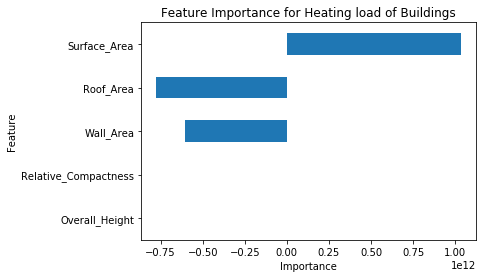

In [48]:
import matplotlib.pyplot as plt
feat_imp.sort_values(key=abs).tail(5).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Heating load of Buildings');

## Penalization Methods

Regularization is a method used to make complex models simpler by penalising coefficients to reduce their magnitude,
variance in training sets and in turn reduce overfitting in the model

There are 2types of regression techniques, namely Ridge and Lasso Regression



### Ridge Regression

Ridge Regression(L2 Regularization is a technique that uses a penalty term to shrink the magnitude of coefficients towards
zero without eliminating them).The shrinkage prevents overfitting caused by the complexity of the model or  collinearity.

As lambda increases, the penalty increases causing more coefficients to shrink in the same vein, if lambda is zero, it results in the loss function.

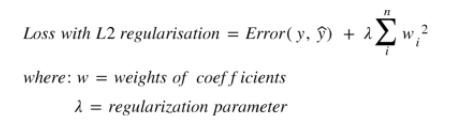

In [49]:
#ridge regression train data
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)
ridge_predicted = ridge_reg.predict(X_test)
ridge_predicted[:5]

array([0.35978767, 0.21312577, 0.6936493 , 0.80088647, 0.25834712])

In [50]:
#MAE for ridge regression
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(y_test, ridge_predicted)
print('MAE for Ridge Regression', round(mae, 3))

MAE for Ridge Regression 0.058


#R-score for ridge regression
from sklearn.metrics import r2_score
r2_score=r2_score(y_test, ridge_predicted)
print('R2 Score for Ridge Regression', round(r2_score, 3))

In [82]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(y_test, ridge_predicted))
print('RMSE for Ridge Regression', round(mae, 3))

RMSE for Ridge Regression 0.058


In [93]:
train_score_r = ridge_reg.score(X_train, y_train)
test_scorel_r = ridge_reg.score(X_test, y_test)
coeff_used_r= np.sum(ridge_reg.coef_!=0)
print('Train R2 :', train_score_r)
print('Test R2 :', test_scorel_r)
print('Number of features with weight greater than zero:', coeff_used_r)

Train R2 : 0.9160470641125456
Test R2 : 0.9112076080095551
Number of features with weight greater than zero: 8


In [81]:
from sklearn.cross_validation import KFold, cross_val_score
print(cross_val_score(ridge, X_train, y_train, cv=5))

NameError: name 'ridge' is not defined

### Lasso Regression

Feature Selection is the process of selecting significant features that contribute the most in obtaining high performing models

Lasso(Least Absolute Shrinkage and Selection Operator) reduces overfitting of dataset by penalising the coefficients such that some are shrunk to zero and indirectly performs feature selection by selecting only a subset of features leaving relevant variables that minimize prediction errors.

In [84]:
from sklearn.linear_model import Lasso
lasso_reg= Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
lasso_predicted = lasso_reg.predict(X_test)
lasso_predicted[:5]

array([0.36548163, 0.21428219, 0.71165513, 0.78836975, 0.25936726])

In [50]:
lasso_reg.coef_

array([-0.02138666,  0.        ,  0.21333861, -0.        ,  0.458991  ,
       -0.        ,  0.21046028,  0.02236662])

In [53]:
#R-score for lasso regression
from sklearn.metrics import r2_score
r2_score=r2_score(y_test, lasso_predicted)
print('R2 score for Lasso Regression', round(r2_score, 3))

R2 score for Lasso Regression 0.908


In [40]:
linear_model.coef_

array([-6.23722827e-01,  1.03320071e+12, -6.02700413e+11, -7.74900531e+11,
        3.88427734e-01, -1.98021531e-03,  2.14831352e-01,  3.12554836e-02])

In [94]:
train_score_l = lasso_reg.score(X_train, y_train)
test_score_l = lasso_reg.score(X_test, y_test)
coeff_used_l= np.sum(lasso_reg.coef_!=0)
print('Train R2 :', train_score_l)
print('Test R2 :', test_score_l)
print('Number of features with weight greater than zero:', coeff_used_l)

Train R2 : 0.9124412788233779
Test R2 : 0.9077150753741525
Number of features with weight greater than zero: 5


## Elastic-Net Regression

In [98]:
from sklearn.linear_model import ElasticNet 
enet = ElasticNet(alpha=1, random_state=42)
enet.fit(X_train, y_train)
train_score_enet = enet.score(X_train, y_train)
test_score_enet = enet.score(X_test, y_test)
print('Train R2 :', train_score_enet)
print('Test R2 :', test_score_enet)
print('Number of features with weight greater than zero:', coeff_used_l)

Train R2 : 0.0
Test R2 : -0.007182871738558916
Number of features with weight greater than zero: 5


In [41]:
import pandas as pd
#Comparing effects of regularization
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights=pd.Series(model.coef_, feat.columns).sort_values()
    weights_df=pd.DataFrame(weights).reset_index()
    weights_df.columns=['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights= get_weights_df(linear_model, X_train, 'Linear_Model_Weight')
ridge_weights_df= get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df= get_weights_df(lasso_reg, X_train, 'Lasso_Weight')

  

In [42]:
final_weights=pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights=pd.merge(final_weights, lasso_weights_df, on='Features')

In [65]:
print(final_weights)

                    Features  Linear_Model_Weight  Ridge_Weight  Lasso_Weight
0                  Roof_Area        -7.749005e+11     -0.168023     -0.000000
1                  Wall_Area        -6.027004e+11      0.111527      0.213339
2       Relative_Compactness        -6.237228e-01     -0.286777     -0.021387
3                Orientation        -1.980215e-03     -0.001297     -0.000000
4  Glazing_Area_Distribution         3.125548e-02      0.031448      0.022367
5               Glazing_Area         2.148314e-01      0.214702      0.210460
6             Overall_Height         3.884277e-01      0.439453      0.458991
7               Surface_Area         1.033201e+12     -0.060960      0.000000


## Model Tuning and Choosing Parameters

Machine Learning parameters that define the model architecture are referred to as hyperparameters while the process of 
exploring a range of values is called hyperparameters tuning

Distinction btw model  parameters and hyperparameters is that model parameters are learnt during the training phase while the

Hyperparameters is exclusive of the training process.The 2 common strategies for hyperparameters are Grid search and Random
search.

Grid Search explores the combination of a grid of parameters such that for every combination of parameters, a model is built
and evaluated then the model with the best result is selected with its corresponding parameters.it is expensive but quite easy

Random search randomly combines parameter values in the grid to build and evaluate models.it allows for quick exploration.
#It allows for quick exploration of the entire action space to reach optimal values.

# Hyperparmeter Optimization Lasso Regression

In [109]:
from sklearn.model_selection import cross_val_score, GridSearchCV
lasso = Lasso(random_state=42).fit(X_train, y_train)
params= {'alpha': [0.00001, 0.0001, 0.001, 0.01]}
lasso_GS = GridSearchCV(estimator=lasso, 
                        param_grid = params,
                            cv = 5,
                            scoring = 'r2')
lasso_GS.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [110]:
lasso_GS.best_params_

{'alpha': 1e-05}

In [111]:
lass_final= lasso.set_params(**lasso_GS.best_params_).fit(X_train, y_train)

In [113]:
lasso_GS.score(X_test, y_test)

0.9128139627820501

In [1]:
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)